1\. Write a function that converts number representation, bin<->dec<->hex. (Clearly using the corresponding python built-in functions is not fair..)

In [7]:
def to_base(i, b): #expects either an int or a string, returns a string
    i=int(i)
    s=""
    while i!=0:
        r=i%b
        #print(r)
        if(r<10):
            s=chr(48+r)+s
        else:
            s=chr(87+r)+s
        i=i//b
        #print(i)
    return s

to_base(155, 2)

'10011011'

2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [15]:
def myfloat(s:str):
    bits=int(s)
    sign=bits>>31
    exp=(bits>>23)&0xff
    mantissa=bits&0x7fffff
    return mantissa*(2**(-150+exp))*(-1)**sign

from ast import literal_eval
print(myfloat("0101001101101101010100101010101"))

-2.3126798903933075e-15
699836757.0


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [17]:
from numpy import isinf
def float_limits():
    i=1.0
    o=1
    while not isinf(i):
        o+=1
        i*=2
    i=1.0
    u=1
    while i!=0:
        u-=1
        i/=2
    
    return o, u

float_limits()

(1025, -1074)

4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [25]:
def prec():
    i=1.0
    p=1
    newi=i+2**p
    while newi!=i:
        i=newi
        newi=i+2**p
        p-=1
    return p

print(prec())

-53


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [32]:
def quad(a,b,c):
    return ((-b+(b**2-4*a*c)**0.5)/(2*a), (-b-(b**2-4*a*c)**0.5)/(2*a))

def quad_alt(a,b,c):
    return (2*c/(a*(-b-(b**2-4*a*c)**0.5)), 2*c/(a*(-b+(b**2-4*a*c)**0.5)))
a,b,c=0.001, 1000, 0.001
print(quad(a,b,c))
print(quad_alt(a,b,c))
#print(b-(b**2-4*a*c)**0.5, 2*a*c-2*((a*c)**2))

(-9.999894245993346e-07, -999999.999999)
(-0.001000000000001, -1000010575.5125058)
1.999978849198669e-09 1.999998e-06


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

0.001 1.0009999999998895
0.0001 1.0000999999998899
1e-05 1.0000100000065513
1e-06 1.0000009999177333
1e-07 1.0000001005838672
1e-08 1.0000000039225287
1e-09 1.000000083740371
1e-10 1.000000082840371
1e-11 1.000000082750371
1e-12 1.0000889005833413
1e-13 0.9992007221627407
1e-14 0.9992007221626509


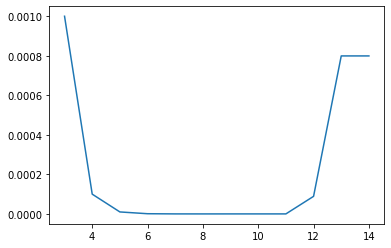

In [96]:
import matplotlib.pyplot as plt
def myfunc(x):
    return x*(x-1)

def derivative(func, delta):
    def d(x):
        return (func(x+delta)-func(x))/delta
    return d

a=[]

for i in range(3,15):
    delta=10**(-i)
    a.append([i, derivative(myfunc, delta)(1)])
    print(delta, a[-1][1])
    
plt.plot([i[0] for i in a], [abs(1-i[1]) for i in a])

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [87]:
from numpy import arange, sqrt
import decimal
def integrate(func, a, b, steps):
    res=0
    w=(b-a)/steps
    for i in arange(a,b, w):
        res+=w*func(i)
        #print(i)
    return res

print(integrate(lambda x:x,  -1, 1, 100))
print(integrate(lambda x:(1-x**2)**0.5, -1, 1, 1000))
print(integrate(lambda x:1/(1+x**2), -1, 1, 1000))

-0.01999999999999795
1.57074373850107
1.5707959934615623
